---
### Lecture notes - CART - Classification and regression trees
---

This is the lecture note for **decision tree**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to decision tree. I encourage you to read further about decision trees. </p>

Read more:
- [DecisionTreeClassifier sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [DecisionTreeRegressor sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- [Decision trees sklearn theory](https://scikit-learn.org/stable/modules/tree.html)
- [Decision tree learning wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLRv2 pp. 327-352](https://www.statlearning.com/)
---

# Decision tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/joeloscarsson/Documents/www/Machine-Learning/data/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
df.info() # missing data on salary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [3]:
# Kastar alla rader för vi är ute efter att prediktera salary
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

<Axes: xlabel='Years', ylabel='Hits'>

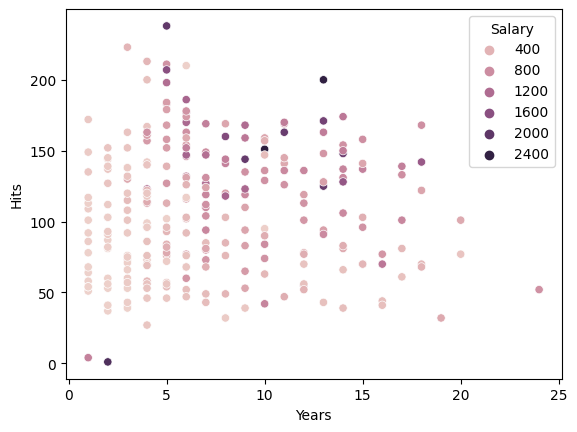

In [5]:
sns.scatterplot(data = df, x = "Years", y = "Hits", hue="Salary")

## More EDA - left for reader

---
## Decision tree regression

The goal is to stratify or segment the players into several regions. In decision tree for regression, the algorithm creates a tree to minimize the RSS (residual sum of squares). The tree-building process uses recursive binary splitting, a top-down greedy approach to divide the predictor space into branches. For example the baseball dataset with years and hits we could have a split into the following regions: 

$R_1 = \{X|Years < 4.5\}, R_2 = \{X|Years \ge 4.5, Hits < 117.5\}, R_3 = \{X|Years \ge 4.5, Hits \ge 117.5\}$

For decision trees, you shouldn't scale the data.

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model = DecisionTreeRegressor(max_depth=3)

# plockar ut dessa från df
X, y = df[['Years', 'Hits']], df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((210, 2), (53, 2), (210,), (53,))

In [7]:
model.fit(X_train, y_train)
model.feature_importances_ # vi kan titta vilken feature som har högst importance, finns ett förhållande mellan denna och max_depth

array([0.59097087, 0.40902913])

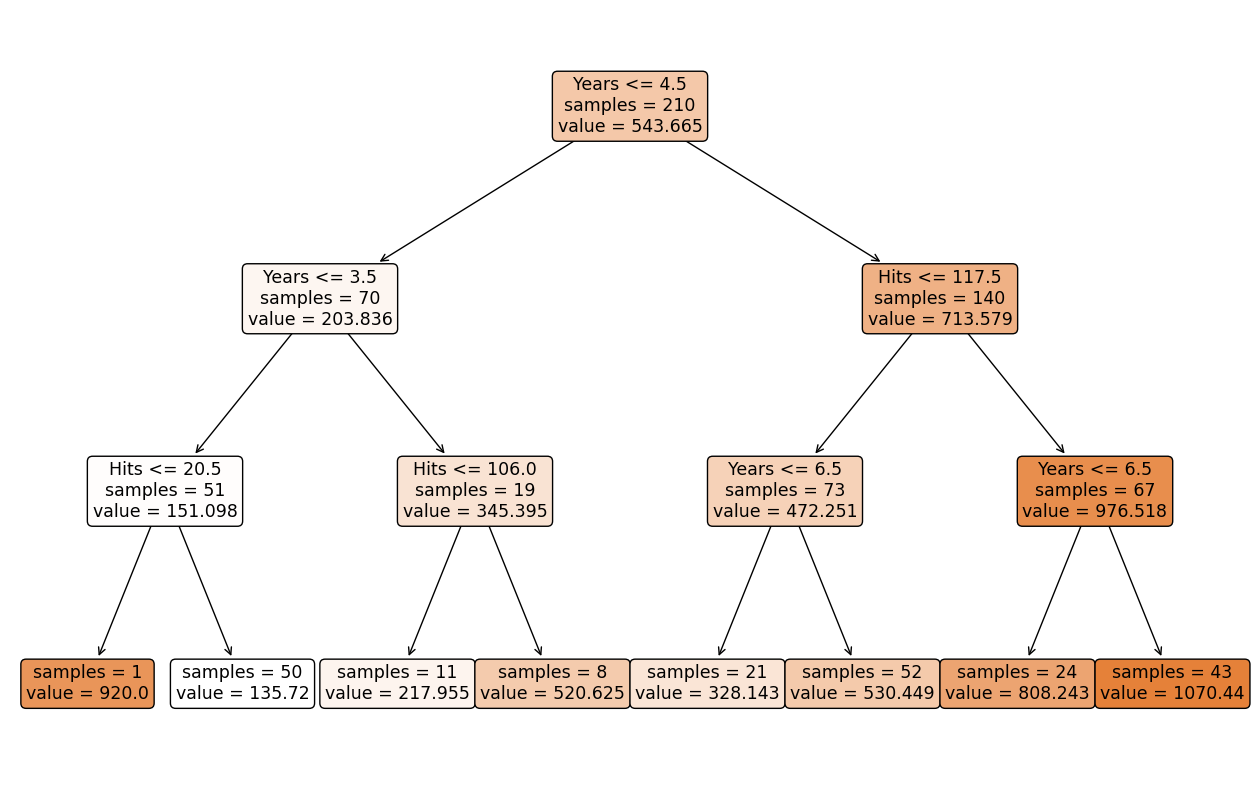

In [8]:
from sklearn import tree

fig = plt.figure(figsize=(16,10))
tree.plot_tree(model, filled=True, feature_names=X_train.columns, impurity=False, rounded=True);

In [9]:
# Note: krävde en list av x_train.columns
print(tree.export_text(model, feature_names = list(X_train.columns)))

# TODO: For the reader to parse this text and extract predictors and their respective thresholds

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- Hits <= 20.50
|   |   |   |--- value: [920.00]
|   |   |--- Hits >  20.50
|   |   |   |--- value: [135.72]
|   |--- Years >  3.50
|   |   |--- Hits <= 106.00
|   |   |   |--- value: [217.95]
|   |   |--- Hits >  106.00
|   |   |   |--- value: [520.62]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- Years <= 6.50
|   |   |   |--- value: [328.14]
|   |   |--- Years >  6.50
|   |   |   |--- value: [530.45]
|   |--- Hits >  117.50
|   |   |--- Years <= 6.50
|   |   |   |--- value: [808.24]
|   |   |--- Years >  6.50
|   |   |   |--- value: [1070.44]



### Evaluate on test data

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
MAE, MSE, RMSE = mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

MAE, MSE, RMSE

(240.73162389212368, 116306.88265000835, 341.03794898809775)

In [11]:
percentage_RMSE = RMSE / np.mean(y_test)
percentage_RMSE

0.674971227249999

---
## Decision tree classification

As in the regression case, the tree is grown through recursive binary splitting that minimizes a loss function locally. However RSS can't be used as loss function in classification. Instead Gini impurity or cross-entropy can be used. 

Gini impurity measures a nodes purity, with a small value showing that most of the observations come from one class:
$$G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$

where $\hat{p}_{mk}$ is the proportion of training observations in region $m$ from class $k$. So when $\hat{p}_{mk}$ is near 0 or 1, which means most of that region is from one class, the Gini impurity becomes small.

Cross-entropy is numerically similar to the Gini impurity, as it will be near 0 when $\hat{p}_{mk}$ is near 0 or 1:
$$D = -\sum_{k=1}^K \hat{p}_{mk}\log{\hat{p}_{mk}}$$

In [24]:
df = pd.read_csv("/Users/joeloscarsson/Documents/www/Machine-Learning/data/Default.csv")

# note Decision tree in sklearn can't handle categorical variables directyl, must dummy encode
df = pd.get_dummies(df, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [25]:
X, y = df.drop("default_Yes", axis=1), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 3), (2000, 3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.35      0.32      0.34        69

    accuracy                           0.96      2000
   macro avg       0.67      0.65      0.66      2000
weighted avg       0.95      0.96      0.96      2000



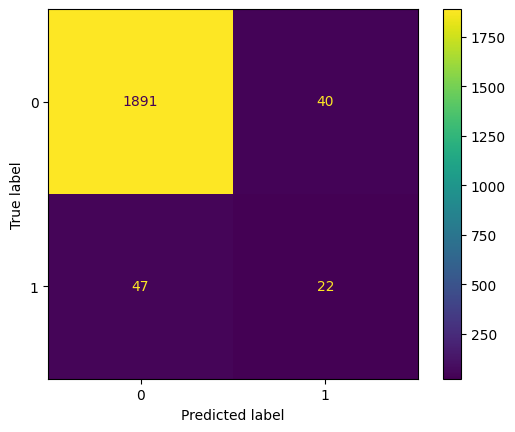

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
# Den är bra på att ta de positiva för detta datasetet är extremt obalanserat

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();